In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv("../../data/data_processed/data_processed.csv")

X = df.drop("NSP", axis=1)
y = df["NSP"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

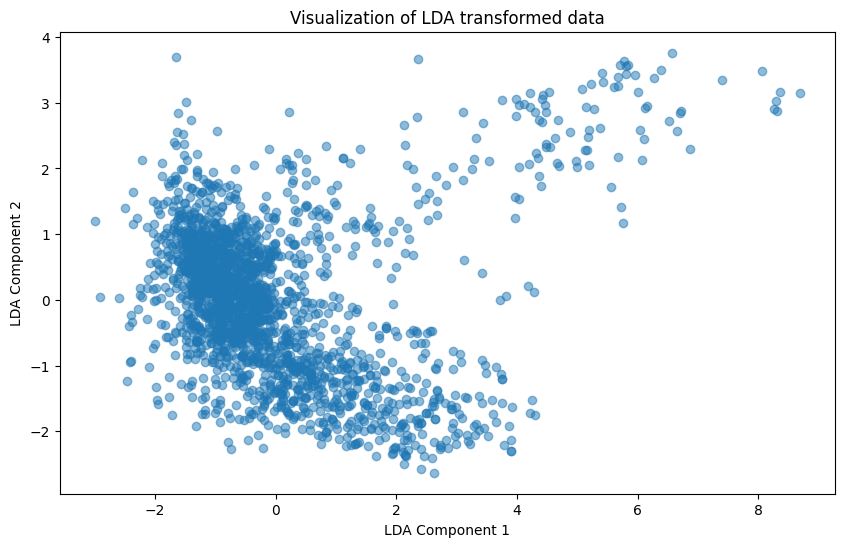

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=0.5)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Visualization of LDA transformed data')
plt.show()


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

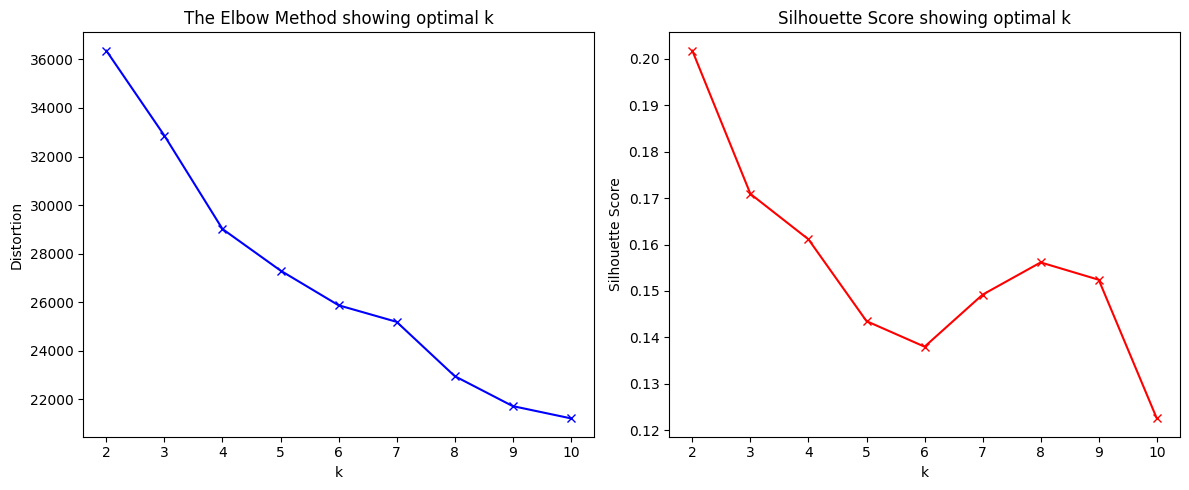

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing optimal k')

plt.tight_layout()
plt.show()

In [30]:
# Fit K-means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

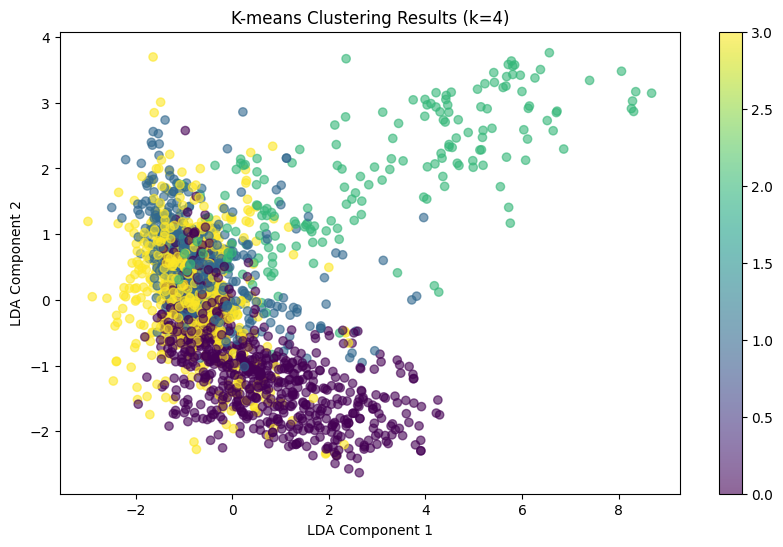

In [31]:
# Plot the clusters using LDA transformed data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('K-means Clustering Results (k=4)')
plt.show()

In [32]:
# Get cluster centers and sizes
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=X.columns
)

cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)
print("\nCluster centers:")
print(cluster_centers)


Cluster sizes:
0    710
1    582
2    190
3    644
Name: count, dtype: int64

Cluster centers:
           LB        AC         FM        UC        DL            DS  \
0  141.270423  1.800000   1.888732  2.939437  0.143662 -7.372575e-18   
1  124.116838  1.850515   2.687285  3.542955  1.010309 -6.938894e-18   
2  127.894737  1.194737  37.310526  5.273684  5.621053  3.684211e-02   
3  134.419255  4.978261   8.386646  4.083851  2.453416 -6.938894e-18   

             DP       ASTV      MSTV       ALTV  ...       Width         Min  \
0 -5.551115e-17  57.770423  0.620845  23.460563  ...   37.519718  123.821127   
1  3.264605e-02  39.517182  1.309966   4.285223  ...   55.910653   93.467354   
2  1.184211e+00  50.852632  2.498421   0.110526  ...  115.289474   60.442105   
3  3.726708e-02  40.718944  1.794410   2.736025  ...  106.652174   70.116460   

          Max      Nmax    Nzeros        Mode        Mean      Median  \
0  161.340845  2.207042  0.102817  147.609859  146.404225  148.201408 